In [12]:
import numpy as np
import matplotlib.pyplot as plt

from Tight_Binding.tight_binding.extract_parameter import input_data
from Tight_Binding.tight_binding.hamiltonian import hamiltonian
from Tight_Binding.tight_binding.k_path import k_path

from Tight_Binding.tight_binding.extract_parameter import extract_parameter

# Import Data

In [13]:
loc_parameter = "Data/CsCl/parameterTB.dat"
loc_atom_position = "Data/CsCl/atomic_position.csv"
loc_orbital_index = "Data/CsCl/orbital_index.csv"

In [14]:
parameter = input_data(loc_parameter, loc_atom_position, loc_orbital_index, 
           a = 1.0,
           b = 1.0,
           c = 1.0)

In [29]:
parameter.get_parameter_TB().head()

,X,Y,Z,A,B,Re,Im
0,0,0,0,1,1,0.500,0.00
1,0,0,0,1,2,0.001,-0.01
2,0,-1,0,1,2,0.001,-0.01
3,1,-1,0,1,2,0.001,-0.01
4,1,0,0,1,2,0.001,-0.01


In [16]:
input_hamiltonian = parameter.vec_lattice()
input_hamiltonian.head()

,X,Y,Z,A,B,Re,Im,Rx,Ry,Rz
0,0,0,0,1,1,0.500,0.00,0.0,0.0,0.0
1,0,1,0,2,1,0.001,-0.01,0.5,0.5,-0.5
2,-1,1,0,2,1,0.001,-0.01,-0.5,0.5,-0.5
3,-1,0,0,2,1,0.001,-0.01,-0.5,-0.5,-0.5
4,0,0,0,2,1,0.001,-0.01,0.5,-0.5,-0.5


# Import K-path

In [23]:
a = 1.0
pi = np.pi
k = np.array(
    [[0.0, 0.0, 0.0],
     [0.0, pi/a, 0.0],
     [pi/a, pi/a, 0.0],
     [0.0, 0.0, 0.0],
     [pi/a, pi/a, pi/a]]
     )
k_p = k_path(k, 50)

# Future (Hamiltonian as function k)

## Testing using single k

In [24]:
hamiltonian([0.0, 0.0, 0.0], input_hamiltonian)

array([[ 0.5  +0.j, -0.072+0.j],
       [-0.072+0.j,  0.5  +0.j]])

## Using multiple k

In [25]:
def multiple_hamiltonian(k_path_grid, input_hamiltonian, hamiltonian_func):
    multiple_hamiltonian = []
    for i in range(len(k_path_grid)):
        ham = hamiltonian_func(k_path_grid[i], input_hamiltonian)
        multiple_hamiltonian.append(ham)
    multiple_hamiltonian = np.array(multiple_hamiltonian, dtype=np.complex128)
    return multiple_hamiltonian

In [26]:
ham = multiple_hamiltonian(k_p, input_hamiltonian, hamiltonian)

In [27]:
eig = np.linalg.eigvals(ham)

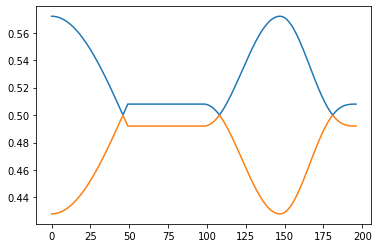

In [28]:
plt.plot(eig[:,0])
plt.plot(eig[:,1])
plt.show()

In [12]:
k_p[4]

array([0.        , 3.14159265, 0.        ])

In [13]:
ham[4]

array([[1.  +0.j, 0.08+0.j],
       [0.08+0.j, 1.  +0.j]])

In [12]:
k_p[15]

array([2.0943951 , 3.14159265, 0.        ])

In [13]:
ham[15]

array([[1.0000000e+00+0.j, 6.9388939e-18+0.j],
       [6.9388939e-18+0.j, 1.0000000e+00+0.j]])

# DOS